# The Pipeline Abstraction

The most basic object in the Transformers library is the `pipeline()` function. It connects a model with its necessary preprocessing and postprocessing steps, allowing us to directly input any text and get an intelligible answer.



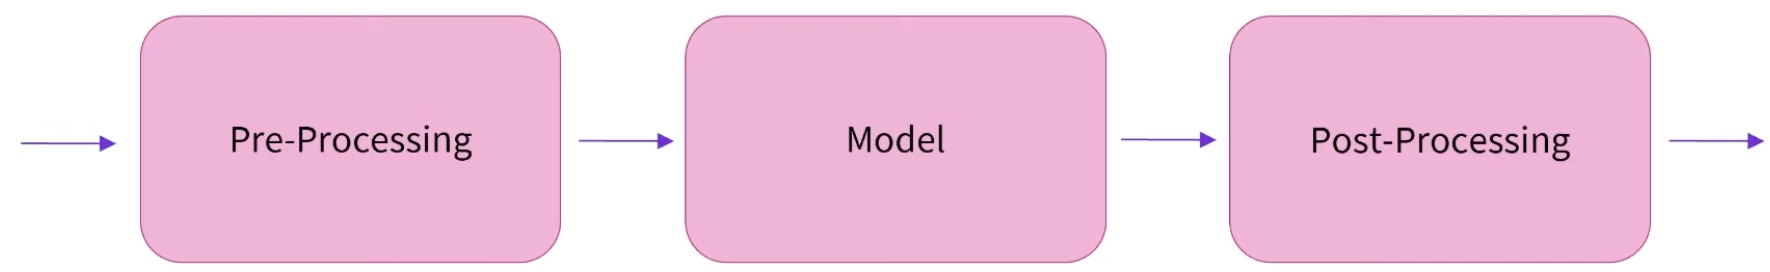

There are three main steps involved when you pass some text to a pipeline:

- The text is preprocessed into a format the model can understand.
- The preprocessed inputs are passed to the model, and predicted upon.
- The predictions of the model are post-processed, so you can make sense of them.

## Summarization

In [ ]:
from transformers import pipeline

summarizer = pipeline("summarization", model ="philschmid/bart-large-cnn-samsum")

summarizer("""
In the 16th century, an age of great marine and terrestrial exploration, Ferdinand Magellan led the first expedition to sail around the world. As a young Portuguese noble, he served the king of Portugal, but he became involved in the quagmire of political intrigue at court and lost the king’s favor. After he was dismissed from service by the king of Portugal, he offered to serve the future Emperor Charles V of Spain.

A papal decree of 1493 had assigned all land in the New World west of 50 degrees W longitude to Spain and all the land east of that line to Portugal. Magellan offered to prove that the East Indies fell under Spanish authority. On September 20, 1519, Magellan set sail from Spain with five ships. More than a year later, one of these ships was exploring the topography of South America in search of a water route across the continent. This ship sank, but the remaining four ships searched along the southern peninsula of South America. Finally they found the passage they sought near 50 degrees S latitude. Magellan named this passage the Strait of All Saints, but today it is known as the Strait of Magellan.

One ship deserted while in this passage and returned to Spain, so fewer sailors were privileged to gaze at that first panorama of the Pacific Ocean. Those who remained crossed the meridian now known as the International Date Line in the early spring of 1521 after 98 days on the Pacific Ocean. During those long days at sea, many of Magellan’s men died of starvation and disease.

Later, Magellan became involved in an insular conflict in the Philippines and was killed in a tribal battle. Only one ship and 17 sailors under the command of the Basque navigator Elcano survived to complete the westward journey to Spain and thus prove once and for all that the world is round, with no precipice at the edge.
""")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

[{'summary_text': ' Magellan set sail from Spain on September 20, 1519 . He was the first ship to sail across the Pacific Ocean . He died in a battle with a group of his fellow sailors in the Philippines . Now, he is the first person to sail over the world to the east of the continent .'}]

In [ ]:
from transformers import pipeline

summarizer = pipeline("summarization", model ="meta-llama/Llama-3.2-1B")

summarizer("""
In the 16th century, an age of great marine and terrestrial exploration, Ferdinand Magellan led the first expedition to sail around the world. As a young Portuguese noble, he served the king of Portugal, but he became involved in the quagmire of political intrigue at court and lost the king’s favor. After he was dismissed from service by the king of Portugal, he offered to serve the future Emperor Charles V of Spain.

A papal decree of 1493 had assigned all land in the New World west of 50 degrees W longitude to Spain and all the land east of that line to Portugal. Magellan offered to prove that the East Indies fell under Spanish authority. On September 20, 1519, Magellan set sail from Spain with five ships. More than a year later, one of these ships was exploring the topography of South America in search of a water route across the continent. This ship sank, but the remaining four ships searched along the southern peninsula of South America. Finally they found the passage they sought near 50 degrees S latitude. Magellan named this passage the Strait of All Saints, but today it is known as the Strait of Magellan.

One ship deserted while in this passage and returned to Spain, so fewer sailors were privileged to gaze at that first panorama of the Pacific Ocean. Those who remained crossed the meridian now known as the International Date Line in the early spring of 1521 after 98 days on the Pacific Ocean. During those long days at sea, many of Magellan’s men died of starvation and disease.

Later, Magellan became involved in an insular conflict in the Philippines and was killed in a tribal battle. Only one ship and 17 sailors under the command of the Basque navigator Elcano survived to complete the westward journey to Spain and thus prove once and for all that the world is round, with no precipice at the edge.
""", max_length = 400)

## Text Generation

In [ ]:
import torch
torch.cuda.get_device_name()

'Tesla T4'

In [ ]:
from transformers import pipeline

generator = pipeline("text-generation", model ="meta-llama/Llama-3.2-1B", max_length = 200, device=0)
generator("In this course, we will teach you to")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


[{'generated_text': 'In this course, we will teach you to design and build a robot that can play the game of checkers. You will learn how to program a robot to follow a path, avoid obstacles, and play checkers. You will learn how to program a robot to follow a path, avoid obstacles, and play checkers. You will also learn how to use the Robot Operating System (ROS) to program the robot.\nCheckers is a game played by two players on a board with eight rows and eight columns. The object of the game is to checkmate the opponent’s king. Checkers is a game that has been played for centuries, and it is a great way to learn how to program a robot.\nThis course is designed for beginners who want to learn how to program a robot to play checkers. If you are a beginner, you will learn how to program a robot to follow a path, avoid obstacles, and play checkers. If you are a beginner, you will learn'}]

Instead of default models, you can utilize any of the [text generation models available on Hugging Face Models Hub.](https://huggingface.co/models?pipeline_tag=text-generation&sort=trending)

In [ ]:
from transformers import pipeline

generator = pipeline("text-generation", model="trl-internal-testing/tiny-random-LlamaForCausalLM")
generator("In this course, we will teach you to")

config.json:   0%|          | 0.00/531 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/4.13M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:519: UserWarning: `pad_token_id` should be positive but got -1. This will cause errors when batch generating, if there is padding. Please set `pad_token_id` explicitly by `model.generation_config.pad_token_id=PAD_TOKEN_ID` to avoid errors in generation, and ensure your `input_ids` input does not have negative values.
  warnings.warn(


generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/822 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama_fast.LlamaTokenizerFast'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565 - if you loaded a llama tokenizer from a GGUF file you can ignore this message.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1249: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


[{'generated_text': 'In this course, we will teach you toygon combined superfic ful copy immense Sant whole exterior hills tijd'}]

## Sentiment Analysis

In [ ]:
from huggingface_hub import notebook_login

# Log in to Hugging Face
notebook_login()

In [ ]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis", model = "meta-llama/Llama-3.2-1B")
classifier("I've been waiting for a HuggingFace course my whole life.")

In [ ]:
from transformers import pipeline

generator = pipeline("text-generation", model="meta-llama/Llama-3.2-1B")
generator("This is amazing! What is the sentiment in this sentence? Give it as a JSON.", max_length = 50)

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


[{'generated_text': 'This is amazing! What is the sentiment in this sentence? Give it as a JSON.'}]

# Video Summarization from a YouTube URL

**Step 1. Extract Video Content**
You need to get the transcript or audio of the video.

YouTube Data API: For obtaining closed captions (if available).

OR

Speech-to-Text Services: Convert the video’s audio into text using APIs like OpenAI Whisper, Google Speech-to-Text, or AWS Transcribe.


In [ ]:
!pip install youtube-transcript-api

In [ ]:
from youtube_transcript_api import YouTubeTranscriptApi

# Extract transcript
def get_transcript(youtube_url):
    video_id = youtube_url.split("v=")[-1]
    transcript = YouTubeTranscriptApi.get_transcript(video_id)
    return " ".join([item['text'] for item in transcript])

youtube_url = "https://www.youtube.com/watch?v=Yocja_N5s1I&ab_channel=CrashCourse"
transcript = get_transcript(youtube_url)
print(transcript)

Hello, learned and astonishingly attractive
pupils. My name is John Green and I want to welcome you to Crash Course World History.
Over the next forty weeks together, we will learn how in a mere fifteen thousand years
humans went from hunting and gathering... Mr. Green, Mr. Green! Is this gonna be on
the test? Yeah, about the test: The test will measure
whether you are an informed, engaged, and productive citizen of the world, and it will
take place in schools and bars and hospitals and dorm-rooms and in places of worship. You
will be tested on first dates; in job interviews; while watching football; and while scrolling
through your Twitter feed. The test will judge your ability to think
about things other than celebrity marriages; whether you'll be easily persuaded by empty
political rhetoric; and whether you'll be able to place your life and your community
in a broader context. The test will last your entire life, and it
will be comprised of the millions of decisions that, when taken

**Step 2. Hugging Face Login in the Notebook**

Use the huggingface_hub library to log in.

In [ ]:
from huggingface_hub import notebook_login

# Log in to Hugging Face
notebook_login()

**Step 3. Summarize Using LLaMA3**


To summarize the extracted transcript, load it into LLaMA3. You can interact with LLaMA3 via libraries like transformers.

```code
pip install transformers
```

In [ ]:
from transformers import pipeline

# Load summarization pipeline
summarizer = pipeline("summarization", model="meta-llama/Llama-3.2-1B-Instruct", device=0)

# Summarize the transcript
def summarize_transcript(transcript, max_length=4000):
    return summarizer(transcript, max_length=max_length, min_length=50, do_sample=False)

summary = summarize_transcript(transcript)
print(summary)

config.json:   0%|          | 0.00/877 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.47G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/54.5k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

The model 'LlamaForCausalLM' is not supported for summarization. Supported models are ['BartForConditionalGeneration', 'BigBirdPegasusForConditionalGeneration', 'BlenderbotForConditionalGeneration', 'BlenderbotSmallForConditionalGeneration', 'EncoderDecoderModel', 'FSMTForConditionalGeneration', 'GPTSanJapaneseForConditionalGeneration', 'LEDForConditionalGeneration', 'LongT5ForConditionalGeneration', 'M2M100ForConditionalGeneration', 'MarianMTModel', 'MBartForConditionalGeneration', 'MT5ForConditionalGeneration', 'MvpForConditionalGeneration', 'NllbMoeForConditionalGeneration', 'PegasusForConditionalGeneration', 'PegasusXForConditionalGeneration', 'PLBartForConditionalGeneration', 'ProphetNetForConditionalGeneration', 'Qwen2AudioForConditionalGeneration', 'SeamlessM4TForTextToText', 'SeamlessM4Tv2ForTextToText', 'SwitchTransformersForConditionalGeneration', 'T5ForConditionalGeneration', 'UMT5ForConditionalGeneration', 'XLMProphetNetForConditionalGeneration'].
Your max_length is set to 

[{'summary_text': 'Hello, learned and astonishingly attractive\npupils. My name is John Green and I want to welcome you to Crash Course World History.\nOver the next forty weeks together, we will learn how in a mere fifteen thousand years\nhumans went from hunting and gathering... Mr. Green, Mr. Green! Is this gonna be on\nthe test? Yeah, about the test: The test will measure\nwhether you are an informed, engaged, and productive citizen of the world, and it will\ntake place in schools and bars and hospitals and dorm-rooms and in places of worship. You\nwill be tested on first dates; in job interviews; while watching football; and while scrolling\nthrough your Twitter feed. The test will judge your ability to think\nabout things other than celebrity marriages; whether you\'ll be easily persuaded by empty\npolitical rhetoric; and whether you\'ll be able to place your life and your community\nin a broader context. The test will last your entire life, and it\nwill be comprised of the milli

[{'summary_text': 'Hello, learned and astonishingly attractive\npupils. My name is John Green and I want to welcome you to Crash Course World History.\nOver the next forty weeks together, we will learn how in a mere fifteen thousand years\nhumans went from hunting and gathering... Mr. Green, Mr. Green! Is this gonna be on\nthe test? Yeah, about the test: The test will measure\nwhether you are an informed, engaged, and productive citizen of the world, and it will\ntake place in schools and bars and hospitals and dorm-rooms and in places of worship. You\nwill be tested on first dates; in job interviews; while watching football; and while scrolling\nthrough your Twitter feed. The test will judge your ability to think\nabout things other than celebrity marriages; whether you\'ll be easily persuaded by empty\npolitical rhetoric; and whether you\'ll be able to place your life and your community\nin a broader context. The test will last your entire life, and it\nwill be comprised of the millions of decisions that, when taken together, make your life\nyours. And everything — everything — will be on it. I know, right? So pay attention. [theme music] In a mere fifteen thousand years, humans went\nfrom hunting and gathering to creating such improbabilities as the airplane, the Internet,\nand the ninety-nine cent double cheeseburger. It\'s an extraordinary journey, one that I\nwill now symbolize by embarking upon a journey of my own ... over to camera two. Hi there, camera two ... it\'s me, John Green.\nLet\'s start with that double cheeseburger. Ooh, food photography! So this hot hunk of\nmeat contains four-hundred and ninety calories. To get this cheeseburger, you have to feed,\nraise, and slaughter cows, then grind their meat, then freeze it and\xa0\nship it to its destination;\xa0 you also gotta grow some wheat and then process the living crap out of it until it\'s whiter\nthan Queen Elizabeth the First; then you gotta milk some cows and turn their milk into cheese.\nAnd that\'s not even to mention the growing and pickling of cucumbers or the sweetening\nof tomatoes or the grinding of mustard seeds, etc. How in the sweet name of everything holy did\nwe ever come to live in a world in which such a thing can even be created? And HOW is it\npossible that those four-hundred and ninety calories can be served to me for an amount\nof money that, if I make the minimum wage here in the U.S., I can earn in ELEVEN MINUTES?\nAnd most importantly: should I be delighted or alarmed to live in this strange world of\nrelative abundance? Well, to answer that question we\'re not going\nto be able to look strictly at history, because there isn\'t a written record about a lot of\nthese things. But thanks to archaeology and paleobiology, we CAN look deep into the past.\nLet\'s go to the Thought Bubble. So fifteen thousand years ago, humans were\nforagers and hunters. Foraging meant gathering fruits, nuts, also wild grains and grasses;\nhunting allowed for a more protein-rich diet ... so long as you could find something with\nmeat to kill. By far the best hunting gig in the pre-historic world incidentally was\nfishing, which is one of the reasons that if you look at history of people populating\nthe planet, we tended to run for the shore and then stay there. Marine life was:\nA) abundant, and B) relatively unlikely to eat you. While we tend to think that the life of foragers\nwere nasty, brutish and short, fossil evidence suggests that they actually had it pretty\ngood: their bones and teeth are healthier than those of agriculturalists.\xa0\nAnd anthropologists\xa0 who have studied the remaining forager peoples have noted that they actually spend a lot\nfewer hours working than the rest of us and they spend more time on art,\xa0\nmusic, and storytelling.\xa0 Also if you believe the\xa0\nclassic of anthropology, NISA, they also have a lot more\xa0\ntime for skoodilypooping.\xa0 What? I call it skoodilypooping.\xa0\nI\'m not gonna apologize. It\'s worth noting that cultivation of crops\nseems to have risen independently over the course of milennia in a number of places ... from\nAfrica to China to the Americas ... using crops that naturally grew nearby: rice in\nSoutheast Asia, maize in in Mexico, potatoes in the Andes, wheat in the Fertile Crescent,\nyams in West Africa. People around the world began to abandon their foraging for agriculture.\nAnd since so many communities made this choice independently, it must have been a good choice\n... right? Even though it meant less music and skoodilypooping. Thanks, Thought Bubble. All right, to answer that\xa0\nquestion, let\'s take a look\xa0 at the advantages and\xa0\ndisadvantages of agriculture. Advantage: Controllable food supply. You might\nhave droughts or floods, but if you\'re growing the crops and breeding them to be hardier,\nyou have a better chance of not starving. Disadvantage: In order to keep feeding people\nas the population grows you have to radically change the environment of the planet. Advantage: Especially if you grow grain, you\ncan create a food surplus, which makes cities possible and also the specialization of labor.\nLike, in the days before agriculture, EVERYBODY\'S job was foraging, and it took about a thousand\ncalories of work to create a thousand calories of food ... and it was impossible to create\nlarge population centers. But, if you have a surplus agriculture can\nsupport people not directly involved in the production of food. Like,\xa0\nfor instance, tradespeople,\xa0 who can devote their lives to better farming equipment which in turn makes it easier to\nproduce more food more efficiently which in time makes it possible for a corporation to turn a\xa0 profit on this ninety-nine\xa0\ncent double cheeseburger. Which is delicious, by the way. It\'s actually\nterrible. And it\'s very cold. And I wish I had not eaten it. I mean, can we just compare\nwhat I was promised to what I was delivered? Yeah, thank you. Yeah, this is not that. Some would say that large and complex agricultural\ncommunities that can support cities and eventually inexpensive meat sandwiches are not necessarily\nbeneficial to the planet or even to its human inhabitants. Although that\'s a bit of a tough\nargument to make, coming to you as I am in a series of ones and zeros. ADVANTAGE: Agriculture can be practiced all\nover the world, although in some cases it takes extensive manipulation of the environment,\nlike y\'know irrigation, controlled flooding, terracing, that kind of thing. DISADVANTAGE: Farming is hard. So hard in\nfact that one is tempted to claim ownership over other humans and then have them till\nthe land on your behalf, which is the kind of non-ideal social order that tends to be\nassociated with agricultural communities. So why did agriculture happen? Wait, I haven\'t talked about herders. Herders,\nman! Always getting the short end of the stick. Herding is a really good\xa0\nand interesting alternative\xa0 to foraging and agriculture. You domesticate some animals and then you take them on the\nroad with you. The advantages of herding are obvious. First, you get to be a cowboy. Also,\nanimals provide meat and milk, but they also help out with shelter because they can provide\nwool and leather. The downside is that you have to move around\na lot because your herd always needs new grass, which makes it hard to build cities, unless\nyou are the Mongols. [music, horse hooves] By the way, over the next forty weeks you\nwill frequently hear generalizations, followed by "unless you are the Mongols" [music, hooves]. But anyway one of the main reasons herding\nonly caught on in certain parts of the world is that there aren\'t that many animals that\nlend themselves to domestication. Like, you have sheep, goats, cattle, pigs, horses, camels,\ndonkeys, reindeer, water buffalo, yaks, all of which have something in common. They aren\'t\nnative to the Americas. The only halfway useful herding animal native to the Americas is the\xa0 llama. No, not that Lama,\xa0\ntwo l\'s. Yes, that llama. Most animals just don\'t work for domestication.\nLike hippos are large, which means they provide lots of meat, but unfortunately, they like\nto eat people. Zebras are too ornery. Grizzlies have wild hearts that can\'t be broken. Elephants\nare awesome, but they take way too long to breed. Which reminds me! It\'s time for the\nOpen Letter. Elegant. But first, let\'s see what the Secret\nCompartment has for me today. Oh! It\'s another double cheeseburger. Thanks, Secret Compartment.\nJust kidding, I don\'t thank you for this. An Open Letter to elephants. Hey elephants, You\'re so\xa0\ncute and smart and awesome.\xa0 Why you gotta be pregnant for 22 months? That\'s crazy! And then you only have one kid. If\nyou were more like cows, you might have taken us over by now. Little did\xa0\nyou know, but the greatest\xa0 evolutionary advantage: being useful to humans. Like here is a graph of cow population, and\nhere is a graph of elephant population. Elephants, if you had just inserted yourself into human\nlife the way cows did, you could have used your power and intelligence to form secret\nelephant societies, conspiring against the humans! And then you could have risen up,\nand destroyed us, and made an awesome elephant world with elephant cars, and elephant planes! It would have been so great! But noooo! You\ngotta be pregnant for 22 months and then have just one kid. It\'s so annoying! Best wishes, John Green. Right, but back to the agricultural revolution\nand why it occurred. Historians don\'t know for sure, of course, because there are no\nwritten records. But, they love to make guesses. Maybe population pressure necessitated agriculture\neven though it was more work, or abundance gave people leisure to\xa0\nexperiment with domestication\xa0 or planting originated as a fertility rite - or as some historians\xa0\nhave argued - people needed\xa0 to domesticate grains in\xa0\norder to produce more alcohol. Charles Darwin, like most 19th century scientists,\nbelieved agriculture was an accident, saying, "a wild and unusually good variety of native\nplant might attract the attention of some wise old savage." Off topic, but you will\nnote in the coming weeks that the definition of "savage" tends to be be "not me." Maybe the best theory is that there wasn\'t\nreally an agricultural revolution at all, but that agriculture came out of an evolutionary\ndesire to eat more. Like early hunter gatherers knew that seeds germinate when planted. And,\nwhen you find something that makes food, you want to do more of it. Unless it\'s this food.\nThen you want to do less of it. I kinda want to spit it out. Eww. Ah, that\'s much better. So early farmers would find the most accessible\nforms of wheat and plant them and experiment with them not because they were trying to\nstart an agricultural revolution, because they were like, you know what would be awesome:\nMORE food! Like on this topic, we have evidence that\nmore than 13,000 years ago humans in southern Greece were domesticating snails. In the Franchthi\nCave, there\'s a huge pile of snail shells, most of them are larger than current snails,\nsuggesting that the people who ate them were selectively breeding them to be bigger and\nmore nutritious. Snails make excellent domesticated food sources,\nby the way because A) surprisingly caloric\nB) they\'re easy to carry since they come with their own suitcases, and\nC) to imprison them you just have to scratch a ditch around their living quarters. That\'s not really a revolution, that\'s just\npeople trying to increase available calories. But one non-revolution leads to another, and\xa0 pretty soon you have this,\xa0\nas far as the eye can see. Many historians also argue\xa0\nthat without agriculture\xa0 we wouldn\'t have all the bad things that come with complex civilizations like patriarchy,\ninequality, war, and unfortunately, famine. And, as far as the planet\xa0\nis concerned, agriculture\xa0 has been a big loser. Without it, humans never would have changed the environment so much,\nbuilding dams, and clearing forests, and more recently, drilling for oil that we can turn\ninto fertilizer. Many people made the choice for agriculture\nindependently, but does that mean it was the right choice? Maybe so, and maybe not, but,\nregardless, we can\'t unmake that choice. And that\'s one of the reasons I think it\'s so\nimportant to study history. History reminds us that revolutions are not\nevents so much as they are processes; that for tens of thousands of years people have\nbeen making decisions that irrevocably shaped the world that we live in today. Just as today\nwe are making subtle, irrevocable decisions that people of the future will remember as\nrevolutions. Next week we\'re going to journey to the Indus\nRiver Valley - whoa - very fragile, our globe, like the real globe. We\'re going to travel\nto the Indus River Valley. I\'ll see you then. Crash Course is produced and directed by Stan\nMuller. Our script supervisor is Danica Johnson. The show is written by my high school history\nteacher, Raoul Meyer, and myself, and our graphics team is Thought Bubble. If you want to guess at the phrase of the\nweek, you can do so in comments. You can also suggest future phrases of the week. And if\nyou have a question about today\'s video, please leave it comments where our\xa0\nteam of semi-professional\xa0 quasi-historians will aim to answer it. Thanks for watching, and as we say in my hometown,\nDon\'t Forget To Be Awesome. [theme music] Crash Course World History. [end screen]'}]

# Personalized Email Drafting Assistant

In [ ]:
from transformers import pipeline
from huggingface_hub import notebook_login

# Step 1: Log in to Hugging Face
notebook_login()

# Step 2: Load the LLaMA model
email_generator = pipeline("text-generation", model="meta-llama/Meta-Llama-3-8B-Instruct")

# Step 3: Function to generate an email
def generate_email(context, tone="formal"):
    tone_instruction = f"Write an email in a {tone} tone. "
    prompt = tone_instruction + context

    # Generate the email
    response = email_generator(prompt, max_length=200, num_return_sequences=1, do_sample=True)
    email = response[0]["generated_text"]
    return email


mail = """
Hey Sampurn,

Just wanted to say a big thank-you for helping out with life. I really appreciate it—it made things so much easier, and I’m super grateful.

You’re awesome! Let me know if there’s ever anything I can do to return the favor.

Cheers!
"""
generate_email(mail)

# Emotion Classification using LLaMA

In [ ]:
from transformers import pipeline
from huggingface_hub import notebook_login

# Step 1: Log in to Hugging Face
notebook_login()

# Step 2: Load the LLaMA model
classifier = pipeline("text-classification", model="meta-llama/Meta-Llama-3-8B-Instruct", return_all_scores=True)

# Step 3: Define categories and classify sentences
def classify_sentence(sentence, categories):
    """
    Classify a sentence into predefined categories.

    Args:
        sentence (str): The input sentence to classify.
        categories (list): List of category labels.

    Returns:
        dict: Predicted scores for each category.
    """
    prompt = f"Classify the following sentence into one of these categories: {', '.join(categories)}.\n\nSentence: {sentence}\n\nCategory:"
    response = classifier(prompt)
    return response

# Step 4: Test the classifier

categories = ["Happy", "Sad", "Anger", "Ennui", "Anxiety", "Fear"]
sentence = "This is amazing!"

# Classify the sentence
predictions = classify_sentence(sentence, categories)

print("\n--- Classification Results ---")
for result in predictions[0]:
    print(f"{result['label']}: {result['score']:.4f}")